# Exercices sur les points simples

Objectif : programmer en python

- une fonction pour les connectivités
- une fonction pour les 4-simples
- une fonction pour les 8-simples

### Fonctions

Pour chaque point de l'image X, on va observer la matrice de taille 3x3 qui l'entoure (les 8 voisins).

In [1]:
def petite_matrice(point, X) :
    """Renvoie la matrice 3x3 centrée en point et indique si les points doit être visité
    (-1, False) si le point n'existe pas (bord) et ne doit pas être visité dans le suite de l'algorithme
    @param point: tuple (i,j) coordonnées du point
    @param X: matrice binaire qui correspond à l'image"""

    i,j = point
    mat3x3 = [[(-1, False),(-1, False),(-1, False)], [(-1, False),(-1, False),(-1, False)], [(-1, False),(-1, False),(-1, False)]]
    for k in range(-1,2):
        for l in range(-1,2):
            if 0 <= i+k < len(X) and 0 <= j+l < len(X[0]):
                mat3x3[k+1][l+1] = (X[i+k][j+l], True)
    return mat3x3

#### Connexité : fonction is_one_connex

In [2]:
def to_visit(alpha, val, mat3x3) :
    """Renvoie la liste des alpha-voisins à visiter en fonction de la valeur (val) du pixel central (foreground/background)
    Dans un ordre circulaire dans le sens horaire
    @param alpha: 4 ou 8
    @param val: 0 pour le fond ou 1 pour l'objet
    @param mat3x3: matrice centrée en le point"""
    v = []

    if alpha == 4 :
        # haut, droite, bas, gauche
        for (i, j) in [(0,1), (1,2), (2,1), (1,0)] :
            if mat3x3[i][j][0] == val and mat3x3[i][j][1] :
                v.append((i,j))

    elif alpha == 8 :
        # haut-gauche, haut, haut-droite, droite, ...
        for (i, j) in [(0,0), (0,1), (0,2), (1,2), (2,2), (2,1), (2,0), (1,0)] :
            if mat3x3[i][j][0] == val and mat3x3[i][j][1] :
                v.append((i,j))

    return v

In [3]:
def voisins_suivants(point, mat3x3, alpha):
    """Renvoie la liste des voisins du point dans la matrice 3x3 qui doivent être visités : même valeur que le point central et pas déjà visité
    @param point: tuple (i,j) coordonnées du point
    @param mat3x3: matrice 3x3 centrée en point
    @param alpha: 4 ou 8 pour le type de voisinage"""
    i,j = point
    v = []

    if alpha == 8 :
        # haut-gauche, haut, ...
        for (x,y) in [(i-1, j-1), (i-1, j), (i-1, j+1), (i, j+1), (i+1, j+1), (i+1, j), (i+1, j-1), (i, j-1)] :
            # Si on doit visiter le point
            if 0<=x and x<3 and 0<=y and y<3 and not(x==1 and y==1) and mat3x3[x][y][1] == True and mat3x3[x][y][0] == mat3x3[i][j][0] :
                v.append((x,y))

    elif alpha == 4 :
        # haut, droite, bas, gauche
        for (x,y) in [(i-1, j), (i, j+1), (i+1, j), (i, j-1)] :
            # Si on doit visiter le point
            if 0<=x and x<3 and 0<=y and y<3 and not(x==1 and y==1) and mat3x3[x][y][1] == True and mat3x3[x][y][0] == mat3x3[i][j][0] :
                v.append((x,y))

    return v

In [4]:
def connex_recursif(point, mat3x3, alpha):
    """Parcours tout l'objet connexe en marquant les points visités"""
    res = True
    voisins = voisins_suivants(point, mat3x3, alpha)
    for v in voisins:
        mat3x3[v[0]][v[1]] = (mat3x3[v[0]][v[1]][0], False)
        res = res and connex_recursif(v, mat3x3, alpha)
    return res

In [5]:
def is_one_connex(alpha, mat3x3):
    """Vérifie qu'il y a 1 seul objet alpha-connexe autour du point central de la matrice
    Vérifie aussi le fond"""
    res_f, res_b = False, False

    # Foreground : 1 objet connexe ?
    
    voisins = to_visit(alpha, 1, mat3x3)

    if len(voisins) != 0:
        res_f = True
        v = voisins[0]

        mat3x3[v[0]][v[1]] = (mat3x3[v[0]][v[1]][0], False) # On marque le point v de départ comme visité
        connex_recursif(v, mat3x3, alpha) # Parcours récursif des voisins de v
    
        # Si maintenant il reste des points à visiter c'est qu'il y a plusieurs objets connexes autour
        for v in voisins :
            res_f = res_f and not mat3x3[v[0]][v[1]][1]
    
    if res_f == False : return res_f # arrêt rapide
    
    # Background :

    alpha = 8 if alpha==4 else 4
    voisins = to_visit(alpha, 0, mat3x3)

    if len(voisins) != 0:
        res_b = True
        v = voisins[0]

        mat3x3[v[0]][v[1]] = (mat3x3[v[0]][v[1]][0], False)
        connex_recursif(v, mat3x3, alpha)

        for v in voisins :
            res_b = res_b and not mat3x3[v[0]][v[1]][1]    
    return res_f and res_b

#### (main) Parcours de l'image : fonctions 4-simple et 8-simple

In [6]:
def simple_point(alpha, X) :
    """Trouve les points alpha-simples de l'image X"""
    res = []
    for i in range(len(X)) :
        res.append([])
        for j in range(len(X[i])) :
            mat3x3 = petite_matrice((i,j), X)
            res[i].append(1 if is_one_connex(alpha, mat3x3) else 0)
    return res
    

### Vérifications sur un exemple du cours + affichages

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# affichage des images

def show_image(mat):
    cmap = ListedColormap(['gray','white', 'black'])
    plt.imshow(mat, cmap=cmap, norm=BoundaryNorm([-1.5, -0.5, 0.5, 1.5], cmap.N))
    plt.xticks(range(len(mat[0])))
    plt.yticks(range(len(mat)))
    plt.gca().set_xticks([i + 0.5 for i in range(len(mat[0]))], minor=True)
    plt.gca().set_yticks([i + 0.5 for i in range(len(mat))], minor=True)
    plt.grid(True, which="minor", color="gray", linestyle='--', linewidth=0.5)
    plt.show()

def show_petite_matrice(mat3x3):
    mat = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    for i in range(3):
        for j in range(3):
            mat[i][j] = mat3x3[i][j][0]
    show_image(mat)

In [8]:
# matrice de l'exercice de cours

matrice = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# réponses pour cette matrice

simple4 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0],
           [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

simple8 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
           [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
           [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

Image de base :


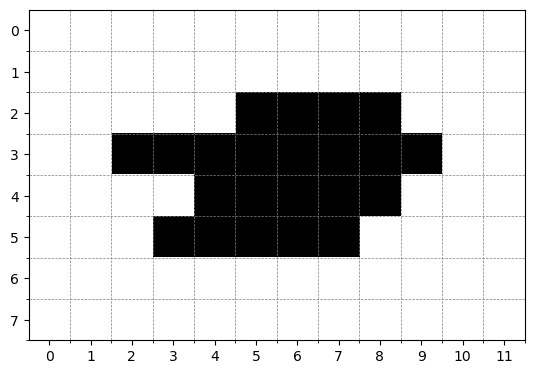

Les 4-simples points :


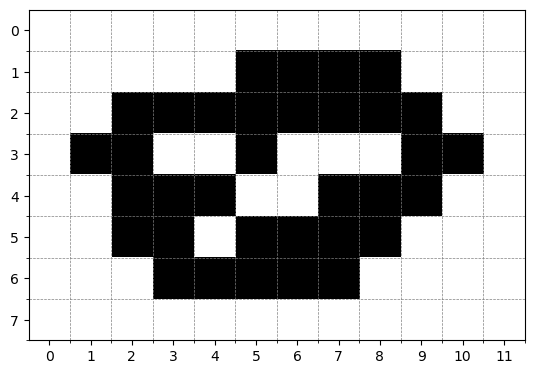

Correction :


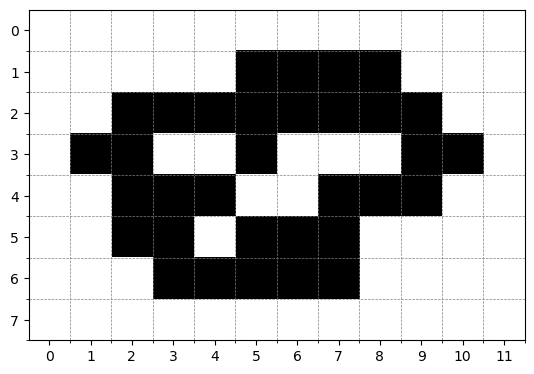

Les 8-simples points :


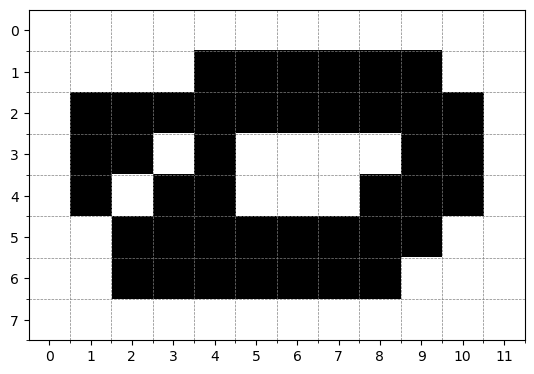

Correction :


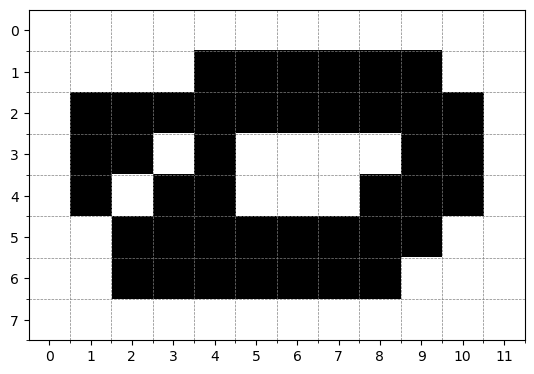

In [9]:
print("Image de base :")
show_image(matrice)

print("Les 4-simples points :")
show_image(simple_point(4, matrice))
print("Correction :")
show_image(simple4)

print("Les 8-simples points :")
show_image(simple_point(8, matrice))
print("Correction :")
show_image(simple8)
